# AMAT503:  Lecture 14

February 23, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

The textbnook for the course is available electronically
[here](https://ucalgary.summon.serialssolutions.com/#!/#!%2Fsearch%3FbookMark=ePnHCXMwhZ3bCoJAEIYNvCjrGcq6CLoQFMLoNjN6gO4H6QBSWLRrh7fvH2ddC4QuxQ_Fw87-M7v7r-e4yFuPHXFTYoMxiNIYSbV43SxC_EMRdyEeV8mQFIlTMnQJOl9ogW5dIGGvc2RuPcdf52hBkJD-M-PNGLSvvzQdvs3AcfW9RDQdbdJdsg2MheubTAWEeBZXHLHXXiBEs6iByiIveOdjKvcR8YIWZChLhHZ2au87M-EzdUbIQTjSih6XahhT0c_zgR0Lq7ITslyyTPPMYKbC1FGfqkuZaZiUrhLId-gLgEMBZfCYbuI8QVFYjZPy9pmTVkC_dCvULKiyqL2VgbiIcrja03KI5h3PGfr3aj8nd5KS)

or [here](https://proquest-safaribooksonline-com.ezproxy.lib.ucalgary.ca/9780470183113?uicode=ucalgary).
Thanks to Phil for pointing this out. 


One of the links should take any student to the ucalgary login page and then to the web version of the book after they successfully login.

In [4]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from pywt import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary - 

- Take aways from the assignment
- Filter design
- Filter design for Daubechies wavelets, Coiflets 





## Assignment take aways

- please typeset your work. It make is clear both to me, and to you, what you really understand.

- finite filters are closely related to trig functions. In particular, the response curves are typically "wavy." You can use Fourier transforms to find the filter coefficients, or you can use trig identiies. 

- Shifts in the coefficients lead to a unital factor $e^{2\pi i \omega}$ in the Fourier transform (filter response). 

- Symmetric filter coefficients give real-valued response functions 

- wavelet transform: don't forget that on iterations, you only transform 1/2 the remaining vector (low pass part)

- differencing part might not notice jumps, because we throw away every other sample. (Usually, we think of differencing as really picking out the jumps!)

- differencing works like a derivation: linear function gets differenced to constant. Quadratic function gets diffeerenced to linear. Etc.

- what's the connection to things like $\sum_1^n k, \sum_1^n k^2, \sum_1^n k^3$ etc?

- filters are connected to polynomials. Roots of polynomials tell you everything about the polynomail (except scale). 

- Daubechies picks lots of roots at $z=1$. Or $z=-1$. Low pass has roots inside the unit circle, high pass has roots outside the unit circle. 

- note the connection between roots of the high and low pass filters. (negative reciprocals).

## Filter design

We can move between filters coefficients and filter reponse using the Fourier transform. Finite filters are connected to polynomials in $z$. Roots of the polynomial tell us all we need to know about the filter or polynomial. 

### Ideal lowpass, highpass filter

The idea lowpass filter looks like this:

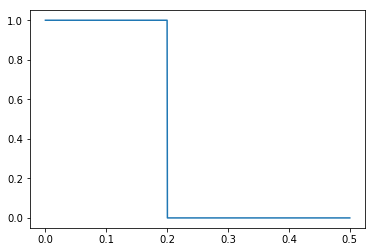

In [17]:
## Plot a low pass response
N=1024
f=linspace(0,0.5,N)
H = (1-sign(f-0.2))/2
plot(f,H,'-')

The frequence $f=0.2$ where the jump happens is called the cutoff frequency.

A high pass filter looks like the following: 

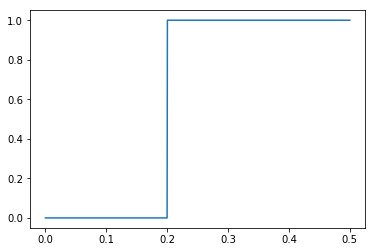

In [16]:
## Plot a high pass response
N=1024
f=linspace(0,0.5,N)
H = (1+sign(f-0.2))/2
plot(f,H,'-')

Obviously we can't get straight lines using simple sums of trig functions. But we can get filter coefficients for an infinitly long convolution filter by computing Fourier coefficients

$$h_n = \int_{-0.5}^{0.5} H(\omega) e^{-2\pi i n \omega} d\omega = \int_{-0.2}^{0.2} \cos(2\pi n) d\omega = 
\frac{\sin(0.4 n \pi)}{n \pi} =0.4 \mbox{sinc}(0.4 n)$$

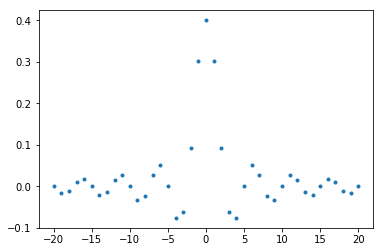

In [30]:
n = arange(-20,21)
h = 0.4*sinc(0.4*n)
plot(n,h,'.')

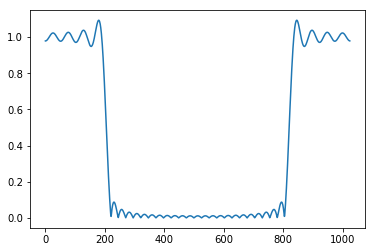

In [23]:
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

# These ripples are called Gibbs phenomena. 

They don't go away even as as you add more terms. 

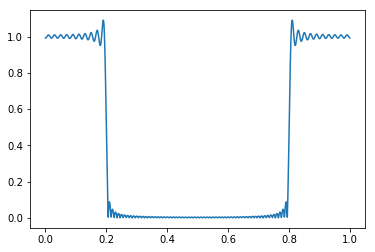

In [43]:
nmax = 50  ## Try different values here. 10, 20, 50, 100
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
f = linspace(0,1,size(hlong))
plot(f,abs(fft(hlong)))

## Truncating with a window

What's going on here is the coefficients $h_n$ are being truncated to a finite non-zero sequence. This is the same as being mulplied by a window, in this case a function that is equal to 1 from -nmax to +nmax, and 0 othersze. The Fourier transform of this window is a sinc function, so it has the wiggles in it. As shown in this diagram:


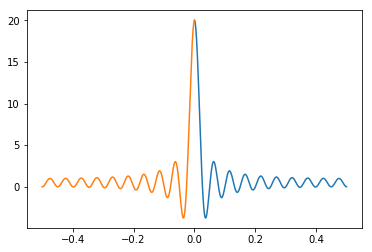

In [107]:
nmax = 10  # this is the half-width of the truncating window
N = 1024
N2 = N//2
f = linspace(0,1,N)
wlong = 0*f
wlong[0:2*nmax] = 1
fftlong = fft(wlong)
front = fftlong[0:N2]
back = fftlong[N2:N]
plot(f[0:N2],real(front),f[0:N2]-.5,real(back))

So these wiggles get convolved with the square shape of the ideal lowpass filter, to get the wiggly version of the lowpass filter.



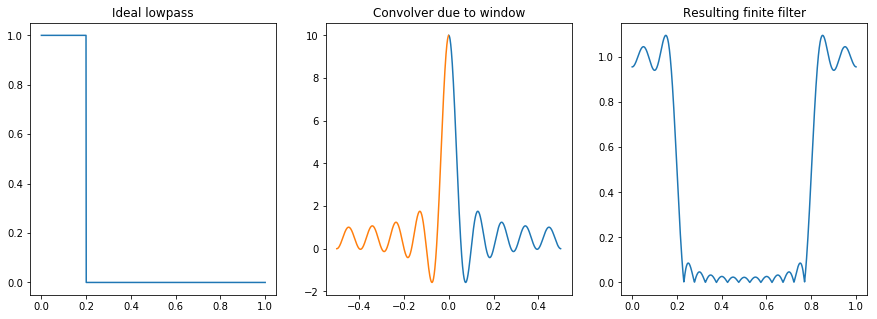

In [154]:
## Plot a low pass response
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 10  ## Try different values here. 10, 20, 50, 100
wlong = 0*f
wlong[0:nmax] = 1
wlong[(N-nmax):nmax] = 1
fftlong = fft(wlong)
front = real(fftlong[0:N2])
back = real(fftlong[N2:N])

#3 Now the FT of the truncated filter coefficients
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
hlong = 0*linspace(0,1,N)
hlong[0:size(h)] =h

ff, axs = subplots(1,3,figsize=(15,5))
subplot(1,3,1,title='Ideal lowpass')
plot(f,H,'-')
subplot(1,3,2,title='Convolver due to window')
plot(f[0:len2],front,f[0:len2]-.5,back)
subplot(1,3,3,title='Resulting finite filter')
plot(f,abs(fft(hlong)))



## Other windows

We can try other windows. 

Here is a Gaussian. The nice thing about a Gaussian is that its FT is also a Gaussian, so we get a nice smoother.

Try different values of nmax

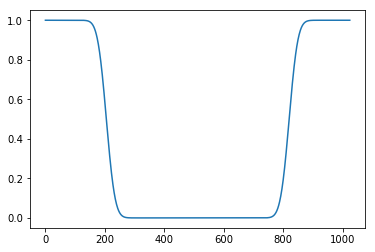

In [136]:
nmax = 30
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = exp(gfactor*(-n**2)/nmax*nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

## Cosine, cosine-squared windows


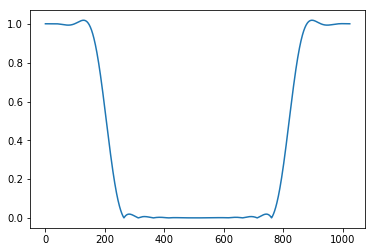

In [142]:
## A cosine window
nmax = 10
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

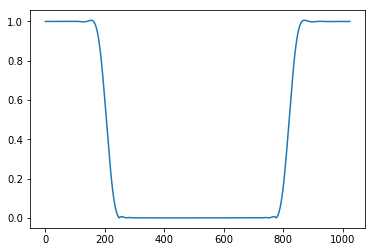

In [144]:
## A cosine squared window
nmax = 20
gfactor = 0.01 # factor inside the Gaussian. Try 0.1 0.01 etc
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/nmax)**2
h=h*window
hlong = 0*linspace(0,1,1024)
hlong[0:size(h)] =h
plot(abs(fft(hlong)))

## Roots of the filter response



In [163]:
N=1024
N2 = 1024//2
f=linspace(0,1,N)
H = (1-sign(f-0.2))/2

## Look at the FT of the square window function
nmax = 9  ## Try different values here. Don't use a multiple of 10, otherwise the polynomial has zero coefficients at the ends . 
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)

r = roots(h)
r


array([ 1.47486378+0.j        ,  1.13193770+0.87420505j,
        1.13193770-0.87420505j, -0.98787003+0.15528296j,
       -0.98787003-0.15528296j, -0.89265241+0.45074568j,
       -0.89265241-0.45074568j, -0.71176603+0.70241663j,
       -0.71176603-0.70241663j, -0.46356450+0.88606318j,
       -0.46356450-0.88606318j, -0.17419320+0.9847115j ,
       -0.17419320-0.9847115j ,  0.12064336+0.99269592j,
        0.12064336-0.99269592j,  0.55337475+0.427376j  ,
        0.55337475-0.427376j  ,  0.67802872+0.j        ])

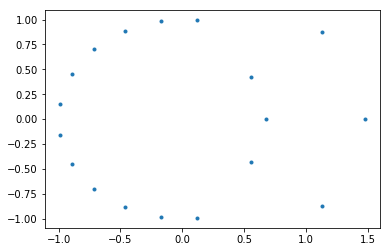

In [164]:
plot(r.real,r.imag,'.')

## Comments on the zeros

Notice there are lots of zeros near the unit circle, but none near z=1 (since lowpass)

## Comparing zeros

Let's look at zeros for the hard truncated window, and then for the cosine-window truncated window.

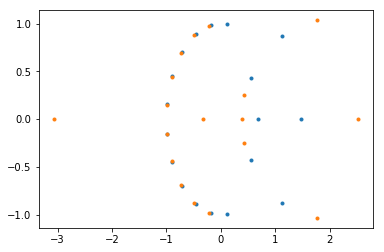

In [182]:
## A cosine squared window
nmax = 9
n = arange(-nmax,nmax+1)
h = 0.4*sinc(0.4*n)
window = cos(0.5*pi*n/(nmax+1))**2
hw=h*window
r = roots(h)
rw = roots(hw)
plot(r.real,r.imag,'.',rw.real,rw.imag,'.')

(-4, 3)

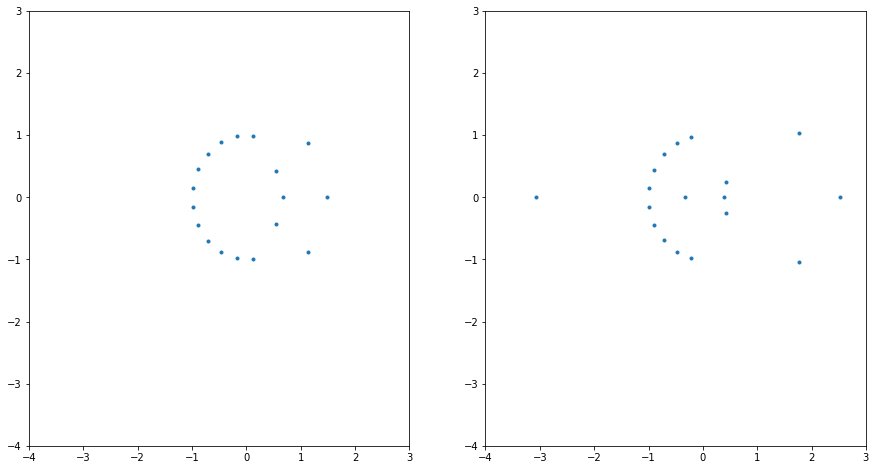

In [184]:
ff, axs = subplots(1,2,figsize=(15,8))
subplot(1,2,1)
plot(r.real,r.imag,'.')
xlim([-4,3])
ylim([-4,3])
subplot(1,2,2)
plot(rw.real,rw.imag,'.')
xlim([-4,3])
ylim([-4,3])


#  Roots and filters

Convolutional filters correspond to polynomial via the Z-transform. The filter reponse is given byt evaluating that polynomial on the unit circle in the complex plane. The amplitude response is given by taking the absolute value of that polynomial. Writing the polynomial as a product of linear terms 
$$c\cdot(z - r_1)(z - r_2)(z - r_3)\ldots$$ where the $r_k$ are the roots, we see the amplitude response is just the product of distances from each root $r_k$ to the point $z$ on the unit circle.

So the amplitude response is completely determined by the location of the roots of the polynomial. (Up to that scaling constant $c$.)

It's a funny fact that replacing the root $r_k$ with with reciprocal $1/r_k$ does not change the amplitude response, except for a trivial scaling factor. This is because we can write
$$ (z-r_k) = r_k(1/r_k - z)/z$$ so taking absolute values (and with $z$ on the unit circle) we have
$$ |z-r_k| = |r_k| \cdot |z-1/r_k|.$$
So the factors $(z-r_k)$ and $(z-1/r_k)$ behave the same way on the unit circle. 

So when we design a filter, we have a choice of choose a root or its reciprocal. 

Daubechies choose her roots for the lowpass filter to always be inside the unit circle. Her highpass filter has roots which are negative reciprocals, so they are outside the unit circle.

In your assignment 2, you would have noticed that Daubechies chooses multiple roots at $z=-1$ for the lowpass filter. This corresponds to a zero at Nyquist frequency, which is the normalized frequency $\omega = 1/2$, since
$$-1 = e^{2\pi i /2}.$$

## Mobius transformations and inner functions

The polynomials $(2z-1)$ and $z-2$ have roots $1/2$ and $2$ which are reciprocals, so they will be equal in modulus on the unit circle (up to a constant, but I was careful to choose the constant to be one). So
$$\frac{|2z-1|}{|z-2|} = 1 \mbox{ for all $|z|=1$.}$$

This function $R(z) = \frac{2z-1}{z-2}$ is a rational function (the **ratio** of two polynomials) and is in fact a special kind called a **linear fractional transformation** or **fractional linear transformation** as it is a ratio of tow linear polynomials. 

This is also called a Mobius transformation. It maps the unit disk in the complex plane 1-to-1 and onto itself. In this case, the point $z=1/2$ gets mapped to the origin, 

These are pretty interesting maps.

For filters, we find them interesting because we can take a polynomial, and multiply it by one of these things, to move an root from outside the unit circle o the inside of the inner circle. (This is just algebra, but it is worth thinking about for a while.) 

In complex analysis, a Blasche product is an infinite product of such Mobius transformations. They have the interesting property that they are analytic on the unit disk, and take values with modulus 1 (absolute value 1) on the unit circle. 

In engineering, these things are called all-pass filters. 

## Recursive filters
## Infinite Impulse Response (IIR) filters

We saw above some rational functions of a complex variable $z$. That is, the ratio of two polynomials. Such a function has roots (zeros of the numerator) and poles (zeros of the denominator). Turns out you have have filters with whose *transfer function* is a rational function. Which is to say the Fourier transform of the filter is a rationa function of complex variable $z$ restricted to the unit circle.

It is best to start with a very simple example.

Imagine you have input and output vectors
$$ \mathbf{x} = (x_0,x_1,x_2,x_3, \ldots)$$ and
$$ \mathbf{y} = (y_0,y_1,y_2,y_3, \ldots)$$

Now compute the output from the input by these formulas:
$$y_0 = x_0$$
$$y_1 = x_1 + \frac{1}{2}y_0$$
$$y_2 = x_2 + \frac{1}{2}y_1$$
$$\cdots$$
$$y_n = x_n + \frac{1}{2}y_{n-1}$$

For example, if we start with input
$$\mathbf{x} = (1,0,00,0,\ldots)$$ we get output
$$\mathbf{y} = (1,1/2, 1/4, 1/8,1/16, \ldots).$$
This sequence $\mathbf{y}$ is called the *impulse response* to the filter. 

It is called an *infinite impulse response* because the single spike (delta function) in the input gave an infinitely long non-zero sequence in the output.

It is called a *recursive filter* because we have to recurse on the previously calculated values of the output $\mathbf{y}$ in order to compute the next entries of $\mathbf{y}$.

## Filter response

For this example, we can take the FT of the impulse response to get the filter response curve.

Let's do this in code.


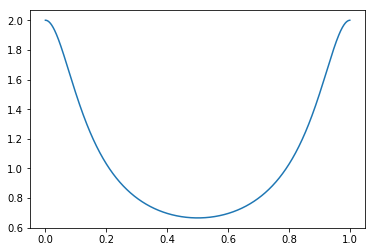

In [8]:
N=1024
f = linspace(0,1,N)
h = 2.0**(-(arange(0,N)))
plot(f,abs(fft(h)))

So this not quite a lowpass filter. But it does amplify low frequencies more than high frequencies, which is what we want in a low pass filter. 

## Impulse response

Another way to compute the impulse response is to do a power series expansion for a rational function.

For convolution filters, the Z-transform gives a polynomial, which gives the freqeuncy respone by evaluating on the unit circle. The coefficients of that polynomial **is** the impulse response. 

For recursive filters, you have to work a little harder.

In our example, we have the computation
$$y_n = x_n + \frac{1}{2}y_{n-1}$$ or equivalently
$$y_n - \frac{1}{2}y_{n-1}= x_n $$, which we recognize as a convolution on the right,
$$g_0y_n + g_1y_{n-1}= x_n $$, with the filter $(g_0,g_1) = (1,-1/2)$.

Taking z-transforms, we get
$$G(z)Y(Z) = X{z}$$ or equivalently
$$Y(z) = \frac{1}{G(z)}X(z),$$
where the rational function
$$R(z) = \frac{1}{G(z)} = \frac{1}{1-z/2}$$
represents the effect of the filter (the transfer function). 

The filter response is give by evaluating $R(z)$ on the unit circle, so
$$R(e^{2\pi i \omega}) = \frac{1}{1-0.5e^{2\pi i \omega}}.$$

We can plot this directly, without using a Fourier transform of the impulse response.

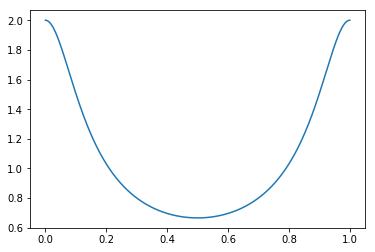

In [9]:
N=1024
f = linspace(0,1,N)
r = 1/(1-0.5*exp(2*pi*1j*f))
plot(f,abs(r))

Notice this is the same plot as before, from the impulse response. 

Of course, we can also get the impulse response directly from the rational function, by expanding in a Taylor series. Notice we can expand that reciprocal as a geometric series:

$$R(z) = \frac{1}{1-z/2} =  1 + (z/2) + (z/2)^2 + (z/2)^3 + (z/2)^4 + \cdots$$
$$ = 1 + (1/2)z + (1/4)z^2 + (1/8)z^3 + (1/16)z^4 + \cdots$$
and those coefficients $1,1/2,1/4,1/8,\cdots$ are exactly the terms that appear in the impulse response above.

## General IIR filters

In general, we can define recursive filters in the form
$$y_n = \sum_{k=0}^N h_k x_{n-k} - \sum_{k=1}^N g_k y_{n-k},$$
where we pick the coefficients $h_k, g_k$ however we like. Notice, however the $h_k$ start at $_0$ while the $g_k$ start at $g_1$. That is because we can only use past values of the $y_{n-k}$ when trying to compute the next value of $y_n$. 

We can pull the sum with the $y_k$'s to the left, and get the convolution form
$$\sum_{k=0}^N g_k y_{n-k} = \sum_{k=0}^N h_k x_{n-k},$$
with the understanding that now we set $g_0 = 1$, so the $y_n$ term is correct. In convolution form we write
$$ \mathbf{g}*\mathbf{y} = \mathbf{h}*\mathbf{x},$$
and taking z-tranforms, the convolution becomes a product, so
$$G(z)Y(z) = H(z)X(z).$$

Thus we have the input-output result as
$$Y(z) = \frac{H(z)}{G(z)}X(z).$$
Now, recall that $H(z), G(z)$ are polynomials, so $R(z) = H(z)/G(z)$ is a rational function, with poles and zeros. So our transfer function is rational. 

The filter response is obtained by evaluating the function $R(z)$ on the unit circle in the complex plane.

As with polynomials, the magnitude of the amplitude is determined by the distance of the zeros and poles to the unit circle. (or course, for the poles, you have to divide by the distance). That is
$$ |R(z)| = c\frac{|z-z_1|\cdot|z-z_2|\cdot|z-z_2|\cdots}{|z-p_1|\cdot|z-p_2|\cdot|z-p_2|\cdots},$$
where the $z_k$ are the zeros and the $p_k$ are the poles.

Note you have to be careful with the poles. They should be outside the unit circle. Because inside the unit circle, you will get unstable filters.

For instance the filter
$$y_n = x_n + 2 y_{n-1}$$ is unstable, since the unit delta input
$$\mathbf{x} = (1,0,0,0,\ldots)$$
leads to the output
$$\mathbf(y) = (1,2,4,8,16,\ldots)$$
which is blowing up. That's bad!

The transfer function is of course $R(z) = 1/(1-2z)$ which has a pole at $z=1/2, inside the unit circle. That is our warnign that the filter will be unstable.

So, as wih zeros, you can always reflect the poles across the unit circle by taking reciprocals.

## Complex conjugate pairs

Keep in mind, your zeros and poles should either be real, or come in complex conjugate pairs. This way the corresponding polynomails and the resulting rational functions will have real coefficients. 

Who cares? Will, if you are filtering real signals, you would like the result to be real. So the coefficients for $h_k,g_k$ better be real. 

## Example. 

A better lowpass filter.  We say that the one recursive term gave us a fast decrease in the lowpas filter. Let's make it a real lowpass filter by inserting a zero at $z=-1$. So we can try something like
$$R(z) = \frac{1+z}{1-0.5z}.$$

Let's look at the filter response for this. But hey, let's be more general. Replace $0.5$ with a parameter $\lambda$ and let's normalize so we have unit amplitude at zero frequency.

So, we try
$$R(z) = \frac{1-\lambda}{2}\frac{1+z}{1-\lambda z}.$$

We can plot this for various values of $\lambda$.

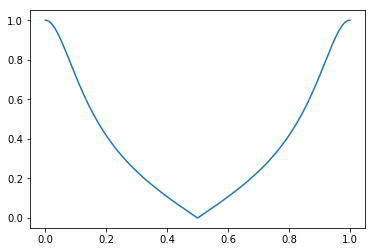

In [18]:
lam = 0.5
N=1024
f = linspace(0,1,N)
r = 0.5*(1-lam)*(1+exp(2*pi*1j*f))/(1-lam*exp(2*pi*1j*f))
plot(f,abs(r))

## Built in filter

There are lots of interesting pre-built filters.

The challenge is to find out how to use them.  

Here we play around with the butterworth filter. This has a maximally flat pass band. (Flat like a pancake, perhaps?)

b,a are the coefficients of the numerator and denominator for the transfer function. The order is important!

In [71]:
from scipy.signal import butter, freqz
b,a = butter(10, .4)   # 10 = order of the filter, .4 = .4 of Nyquist freq. 

In [72]:
b

array([ 0.00049945,  0.00499454,  0.02247543,  0.05993449,  0.10488536,
        0.12586243,  0.10488536,  0.05993449,  0.02247543,  0.00499454,
        0.00049945])

In [73]:
a

array([  1.00000000e+00,  -1.99240148e+00,   3.01948286e+00,
        -2.81852243e+00,   2.03872064e+00,  -1.05454462e+00,
         4.14446269e-01,  -1.15718625e-01,   2.24985093e-02,
        -2.66891235e-03,   1.48764452e-04])

In [74]:
roots(b)

array([-1.04792164+0.01589021j, -1.04792164-0.01589021j,
       -1.02882267+0.04101782j, -1.02882267-0.04101782j,
       -0.99903174+0.04954934j, -0.99903174-0.04954934j,
       -0.97058101+0.03917676j, -0.97058101-0.03917676j,
       -0.95364294+0.01475485j, -0.95364294-0.01475485j])

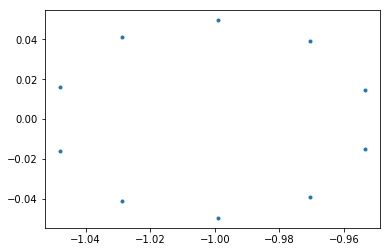

In [75]:
plot(roots(b).real,roots(b).imag,'.')

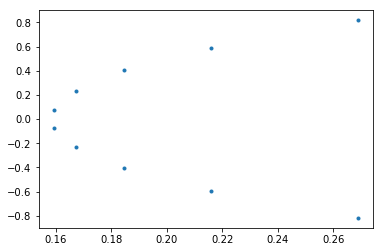

In [76]:
plot(roots(a).real,roots(a).imag,'.')

In [77]:
w, h = freqz(b, a)

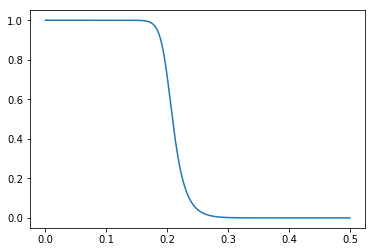

In [79]:
plot(w/(2*pi), abs(h))

(-100, 5)

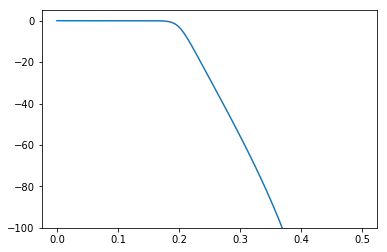

In [83]:
plot(w/(2*pi), 20*log10(abs(h)))
ylim([-100,5])